In [1]:
# Basic imports
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
!ls

Untitled.ipynb
Untitled1.ipynb
data


In [3]:
df = pd.read_csv("data\kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
# Dataframe Cleaning

# Duplicate id
df.drop(index=df.index[4846], axis=0, inplace=True)
# Dropping NAs
df = df.dropna(subset=["heat_source", "sewer_system"], axis=0)


In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.011000e+04,3.011000e+04,30110.000000,30110.000000,30110.000000,3.011000e+04,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000,30110.000000
mean,4.539281e+09,1.108921e+06,3.415211,2.335653,2113.296745,1.664907e+04,1.543491,1810.363766,476.586118,330.469678,217.448854,1975.160844,90.795782,47.328471,-121.318844
std,2.882221e+09,8.964895e+05,0.979769,0.888256,973.436623,5.993401e+04,0.567793,877.729415,579.790030,285.728094,245.305708,32.052466,416.204209,1.433331,5.724166
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,21.274240,-157.791480
25%,2.071850e+09,6.491180e+05,3.000000,2.000000,1420.000000,4.850000e+03,1.000000,1180.000000,0.000000,0.000000,40.000000,1953.000000,0.000000,47.405334,-122.326078
50%,3.876000e+09,8.600000e+05,3.000000,2.500000,1920.000000,7.476000e+03,1.500000,1560.000000,0.000000,400.000000,150.000000,1977.000000,0.000000,47.551437,-122.225815
75%,7.287100e+09,1.300000e+06,4.000000,3.000000,2620.000000,1.056800e+04,2.000000,2270.000000,940.000000,510.000000,320.000000,2003.000000,0.000000,47.669914,-122.116392
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,64.824070,-70.074340


In [7]:
# Baseline model

# Split your data into features (X) and target (y)
cols_to_drop = df.select_dtypes(include=['object']).columns
X = df.drop(columns=cols_to_drop)
X = X.drop("price", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

# X_train_scaled.head()

In [8]:
from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train_scaled, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train_scaled)

# Calculate the R^2 score on the training data
r2_score(y_train, train_preds)

0.42267264208162403

In [9]:
dict(zip(X_train.columns, model_sk.coef_))

{'id': -1661.2249494847451,
 'bedrooms': -164574.01900180551,
 'bathrooms': 117546.72542480785,
 'sqft_living': 343295.83580428484,
 'sqft_lot': 4759.581954495901,
 'floors': -1197.0911693726787,
 'sqft_above': 241672.354115712,
 'sqft_basement': 100366.028996277,
 'sqft_garage': -36395.40447386502,
 'sqft_patio': 60113.870906396594,
 'yr_built': -103721.37885993625,
 'yr_renovated': 16930.84286031753,
 'lat': 38316.2199376031,
 'long': 60835.806476248}

In [10]:
mean_absolute_error(y_train, train_preds)

378957.87705863663

In [11]:
mean_squared_error(y_train, train_preds)

462191194505.39496

In [12]:
df.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.608586
sqft_above       0.538614
bathrooms        0.480284
sqft_patio       0.313787
bedrooms         0.288992
sqft_garage      0.263655
sqft_basement    0.244938
floors           0.180555
yr_built         0.095728
sqft_lot         0.086562
yr_renovated     0.085039
lat              0.063419
long            -0.022271
id              -0.034035
Name: price, dtype: float64

In [13]:
# Dataframe Cleaning

# Dropping price outliers
mask = df['price'] > 1300000
df.drop(df[mask].index, axis=0, inplace=True)

# Getting zipcode from address
df['zipcode'] = df['address'].str.extract(r'(\d{5})').astype(int)

# Changing the column type from obj to int and getting rid of the extra words
df['grade'] = df['grade'].str.split().str[0]
df['grade'] = df['grade'].astype(int)

# Use boolean indexing to get all the addresses that contain "Washington"
df = df[df['address'].str.contains("Washington")]

# Reset the index
df = df.reset_index(drop=True)

# df.drop(columns=['id'], inplace=True)

In [14]:
# Feature Engineering

# Create the list of towns and cities
towns_and_cities = ['Algona',
                    'Auburn',
                    'Beaux Arts Village', 
                    'Bellevue', 'Black Diamond', 
                    'Bothell', 'Burien', 'Carnation', 
                    'Clyde Hill', 'Covington', 
                    'Des Moines', 'Duvall', 
                    'Enumclaw', 
                    'Federal Way',
                    'Hunts Point', 
                    'Issaquah', 
                    'Kenmore', 
                    'Kent', 
                    'Kirkland',
                    'Lake Forest Park',
                    'Maple Valley',
                    'Medina',
                    'Mercer Island',
                    'Milton',
                    'Newcastle', 
                    'Normandy Park',
                    'North Bend', 
                    'Pacific',
                    'Redmond', 
                    'Renton', 
                    'Sammamish',
                    'SeaTac', 
                    'Seattle',
                    'Shoreline',
                    'Skykomish', 
                    'Snoqualmie',
                    'Tukwila', 
                    'Woodinville',
                    'Yarrow Point']

# Create a new column with the city or town name
df["town_or_city"] = df["address"].apply(lambda x: next((town for town in towns_and_cities if town in x), None))

In [15]:
df["town_or_city"] = df["town_or_city"].astype("category")
df["town_or_city_code"] = df["town_or_city"].cat.codes

In [16]:
# correlation = df.corr()["price"]
# columns_to_drop = correlation[abs(correlation) < 0.12].index
# df = df.drop(columns_to_drop, axis=1)

In [17]:
df.corr()["price"].sort_values(ascending=False)

price                1.000000
grade                0.401815
sqft_living          0.385080
lat                  0.347904
bathrooms            0.322609
sqft_above           0.296883
bedrooms             0.217157
town_or_city_code    0.196898
sqft_basement        0.188413
floors               0.173715
sqft_patio           0.167919
sqft_garage          0.122042
yr_built             0.067376
zipcode              0.061864
sqft_lot             0.047586
long                 0.025958
yr_renovated         0.023398
id                   0.000977
Name: price, dtype: float64

In [18]:
X = df.drop(columns=cols_to_drop)
X = X.drop("price", axis=1)
X = X.drop("town_or_city", axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled,
                              columns=X_train.columns,
                              index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled,
                             columns=X_test.columns,
                             index=X_test.index)

In [19]:
# Initialize the linear regression model
model_sk = LinearRegression()

# Fit the model on the training data
model_sk.fit(X_train_scaled, y_train)

# Predict on the training data
train_preds = model_sk.predict(X_train_scaled)

# Calculate the R^2 score on the training data
r2_score(y_train, train_preds)

0.4125759210479205

In [20]:
cols = ['year', 'school_name', "street_location", 'state_location', 'city_location', "school_level", "zip_location", "latitude", "longitude", "urban_centric_locale"]
schools = pd.read_csv("data\schools_info.csv", usecols=cols)

In [21]:
cols = ["enrollment", "school_name"]
enrollment = pd.read_csv("data\enrollment.csv", usecols=cols)

In [22]:
schools["city_location"] = schools["city_location"].str.title()

schools.drop_duplicates(subset=["school_name"], inplace=True)

schools["town_or_city"] = schools["city_location"].apply(lambda x: next((town for town in towns_and_cities if town in x), None))

schools = schools.dropna(subset=["town_or_city"])

In [23]:
merged_schools = schools.merge(enrollment, on='school_name')
merged_schools = merged_schools.drop(['town_or_city'], axis=1)

In [24]:
merged_schools.drop(merged_schools.loc[merged_schools["enrollment"] == 0.0].index, inplace=True)
merged_schools.dropna(inplace=True)
merged_schools = merged_schools[merged_schools["enrollment"] > 100]

In [25]:
merged_schools

,year,school_name,state_location,school_level,street_location,city_location,zip_location,latitude,longitude,urban_centric_locale,enrollment
0,2020,Adelaide Elementary School,WA,Primary,1635 SW 304th ST,Federal Way,98023,47.328994,-122.356452,"Suburb, large",318.0
1,2020,Aki Kurose Middle School,WA,Middle,3928 S GRAHAM ST,Seattle,98118,47.546500,-122.282500,"City, large",719.0
2,2020,Albert Einstein Elementary,WA,Primary,18025 NE 116th,Redmond,98052,47.701900,-122.098300,"City, small",440.0
3,2020,Albert Einstein Middle School,WA,Middle,19343 3rd Avenue N.W.,Shoreline,98177,47.769700,-122.362900,"Suburb, large",1131.0
4,2020,Alexander Graham Bell Elementary,WA,Primary,11212 NE 112TH,Kirkland,98033,47.701622,-122.191302,"Suburb, large",493.0
...,...,...,...,...,...,...,...,...,...,...,...
430,2020,Woodin Elementary,WA,Primary,12950 NE 195 ST,Bothell,98011,47.768500,-122.167700,"Suburb, large",497.0
432,2020,Woodinville HS,WA,High,19819 136 NE,Woodinville,98072,47.771200,-122.161900,"Suburb, large",1708.0
433,2020,Woodmont K-8 School,WA,Primary,26454 16TH AV S,Des Moines,98198,47.363300,-122.312300,"Suburb, large",433.0
434,2020,Woodmoor Elementary,WA,Primary,12225 NE 160,Bothell,98011,47.741300,-122.176400,"Suburb, large",699.0


In [26]:
# def closest_school(df, merged_schools):
#     distances = np.sqrt((merged_schools["latitude"] - df["lat"])**2 + (merged_schools["longitude"] - df["long"])**2)
#     return merged_schools.iloc[np.argmin(distances)]["school_name"]

# df["closest_school"] = df.apply(lambda x: closest_school(x, merged_schools), axis=1)

In [27]:
# from scipy.spatial.distance import cdist

# # create a 2D array of latitudes and longitudes for schools
# school_coords = merged_schools[['latitude', 'longitude']].values

# # create a 2D array of latitudes and longitudes for houses
# house_coords = df[['lat', 'long']].values

# # calculate the distances between each house and each school
# distances = cdist(house_coords, school_coords, 'euclidean')

# # find the index of the closest school to each house
# closest_school_index = distances.argmin(axis=1)

# # get the distance to the closest school for each house
# df['distance_to_school'] = distances.min(axis=1)

In [28]:
# df["distance_to_school"].describe()

In [29]:
gis = pd.read_csv("data\kc_info.csv")
gis["type"].unique()

array(['Abandoned', 'Access_Point', 'Airport', 'Campground',
       'Commercial_Farm', 'Lodging', 'Gate_w/o_Building',
       'Gated_w/_Building', 'Cemetery', 'Government', 'Educational',
       'Cultural', 'Police', 'Fire', 'Public_Gathering', 'Seasonal_Home',
       'Utility'], dtype=object)

In [30]:
from scipy.spatial.distance import cdist

# define a list of relevant types
relevant_types = ['Airport', 
                  'Campground', 
                  'Commercial_Farm',
                  'Lodging', 'Cemetery', 
                  'Government', 'Educational',
                  'Cultural', 'Police', 'Fire',
                  'Public_Gathering', 'Utility', 
                  'Seasonal_Home'
                 ]

# loop through each relevant type and apply the code
for type_name in relevant_types:
    type_df = gis[gis['type'] == type_name]
    coords_to_compare = type_df[['lat', 'lon']].values
    distances = cdist(df[['lat', 'long']].values, coords_to_compare, 'euclidean')
    closest_type_distance = distances.min(axis=1)
    df[f'min_dist_to_{type_name.lower()}'] = closest_type_distance

df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,min_dist_to_lodging,min_dist_to_cemetery,min_dist_to_government,min_dist_to_educational,min_dist_to_cultural,min_dist_to_police,min_dist_to_fire,min_dist_to_public_gathering,min_dist_to_utility,min_dist_to_seasonal_home
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0.021985,0.021290,0.004641,0.006310,0.027789,0.107398,0.017121,0.004093,0.002577,0.325465
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0.011772,0.010485,0.011500,0.007619,0.024877,0.104042,0.027971,0.014596,0.007762,0.435260
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0.021495,0.025218,0.016617,0.005742,0.018978,0.063507,0.004546,0.019718,0.003627,0.334767
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,0.032737,0.005743,0.006429,0.005543,0.020220,0.055818,0.010570,0.003289,0.003787,0.374759
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,0.015641,0.026618,0.011562,0.022592,0.033429,0.140150,0.014659,0.012483,0.003682,0.188235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21797,2865600230,2/28/2022,665000.0,3,2.5,2100,7210,2.0,NO,NO,...,0.032425,0.027375,0.004811,0.007693,0.026393,0.062963,0.024218,0.005556,0.002322,0.364568
21798,9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,...,0.025771,0.002773,0.016050,0.007095,0.016152,0.092459,0.007103,0.009291,0.006442,0.447440
21799,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,0.018532,0.025657,0.006452,0.004329,0.008827,0.021899,0.011516,0.002239,0.010971,0.372984
21800,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,0.025812,0.033528,0.004081,0.009943,0.027256,0.114313,0.007720,0.016645,0.002418,0.331693


In [31]:
df.corr()["price"].sort_values(ascending=False)

price                           1.000000
grade                           0.401815
sqft_living                     0.385080
lat                             0.347904
bathrooms                       0.322609
sqft_above                      0.296883
bedrooms                        0.217157
town_or_city_code               0.196898
sqft_basement                   0.188413
floors                          0.173715
sqft_patio                      0.167919
sqft_garage                     0.122042
yr_built                        0.067376
zipcode                         0.061864
sqft_lot                        0.047586
min_dist_to_campground          0.043311
long                            0.025958
yr_renovated                    0.023398
min_dist_to_airport             0.015606
min_dist_to_cemetery            0.013164
min_dist_to_police              0.010700
min_dist_to_commercial_farm     0.006324
min_dist_to_fire                0.005891
min_dist_to_utility             0.005192
min_dist_to_gove

In [32]:
crime = pd.read_csv("data\kc_crime.csv")

In [33]:
crime["city"] = crime["city"].str.title()

crime["city"] = crime["city"].apply(lambda x: next((town for town in towns_and_cities if town in x), None))

In [34]:
crime = crime.dropna()

In [35]:
# crime["zip"].astype(int)
# crime["city"].astype(str)

In [36]:
crime_by_zip = crime.groupby('zip')["incident_type"].count().reset_index()

In [37]:
crime_by_zip = crime_by_zip.rename(columns={"incident_type": "crime_count"})

In [38]:
crime_by_zip

,zip,crime_count
0,98001,1129
1,98002,155
2,98003,392
3,98004,19
4,98005,12
...,...,...
77,98195,7
78,98198,111
79,98199,2
80,98288,8


In [39]:
for_crime_df = df.loc[:, ["id", "price", "grade", "zipcode", "town_or_city"]]
for_crime_df = for_crime_df.rename(columns={"zipcode": "zip"})

In [40]:
for_crime_df['zip'] = for_crime_df['zip'].astype(str)
crime['zip'] = crime['zip'].astype(str)

merged_crime = pd.merge(for_crime_df, crime_by_zip, on='zip', how='left')

In [41]:
merged_crime = merged_crime.dropna()

In [42]:
merged_crime.isna().sum()

id              0
price           0
grade           0
zip             0
town_or_city    0
crime_count     0
dtype: int64

In [43]:
merged_crime.corr()["price"]

id            -0.019260
price          1.000000
grade          0.387627
crime_count   -0.276745
Name: price, dtype: float64

In [44]:
merged_crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11538 entries, 0 to 21799
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   id            11538 non-null  int64   
 1   price         11538 non-null  float64 
 2   grade         11538 non-null  int32   
 3   zip           11538 non-null  object  
 4   town_or_city  11538 non-null  category
 5   crime_count   11538 non-null  float64 
dtypes: category(1), float64(2), int32(1), int64(1), object(1)
memory usage: 508.6+ KB


In [45]:
X = merged_crime.drop(columns='town_or_city')
X = X.drop(columns='price')
y = merged_crime['price']
cols_to_drop = X.select_dtypes(include=['object']).columns
X = X.drop(columns=cols_to_drop)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=33)

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scale = scaler.transform(X_train)
X_test_scale = scaler.transform(X_test)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns, index=X_train.index)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns, index=X_test.index)
X_train_scale

,id,grade,crime_count
10195,-0.194611,0.860933,0.660498
11233,0.477735,0.860933,-0.628062
21000,1.109945,-1.400262,0.182146
16617,-1.437640,0.860933,-0.119813
9225,1.690244,-0.269664,-0.487547
...,...,...,...
20597,1.099363,-0.269664,0.226992
1084,0.922965,-1.400262,1.581326
11102,-0.617752,-0.269664,-0.631052
4590,-1.235341,-1.400262,3.880405


In [47]:
model_sk = LinearRegression()
model_sk.fit(X_train_scale, y_train)
test_preds = model_sk.predict(X_test_scale)

In [48]:
r2_score(y_test, test_preds)

0.1998557309058827

In [49]:
mean_absolute_error(y_test, test_preds)

184523.10488984527

Text(0.5, 1.0, 'Residuals and Predictions')

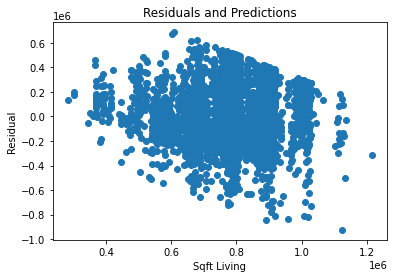

In [50]:
residuals = y_test - test_preds 
fig, ax = plt.subplots()
ax.scatter(test_preds, residuals)
ax.set_xlabel('Sqft Living')
ax.set_ylabel('Residual')
ax.set_title('Residuals and Predictions')

In [51]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,min_dist_to_lodging,min_dist_to_cemetery,min_dist_to_government,min_dist_to_educational,min_dist_to_cultural,min_dist_to_police,min_dist_to_fire,min_dist_to_public_gathering,min_dist_to_utility,min_dist_to_seasonal_home
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,0.021985,0.021290,0.004641,0.006310,0.027789,0.107398,0.017121,0.004093,0.002577,0.325465
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,0.011772,0.010485,0.011500,0.007619,0.024877,0.104042,0.027971,0.014596,0.007762,0.435260
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0.021495,0.025218,0.016617,0.005742,0.018978,0.063507,0.004546,0.019718,0.003627,0.334767
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,0.032737,0.005743,0.006429,0.005543,0.020220,0.055818,0.010570,0.003289,0.003787,0.374759
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,0.015641,0.026618,0.011562,0.022592,0.033429,0.140150,0.014659,0.012483,0.003682,0.188235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21797,2865600230,2/28/2022,665000.0,3,2.5,2100,7210,2.0,NO,NO,...,0.032425,0.027375,0.004811,0.007693,0.026393,0.062963,0.024218,0.005556,0.002322,0.364568
21798,9376300851,10/7/2021,719000.0,3,2.5,1270,1141,2.0,NO,NO,...,0.025771,0.002773,0.016050,0.007095,0.016152,0.092459,0.007103,0.009291,0.006442,0.447440
21799,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,0.018532,0.025657,0.006452,0.004329,0.008827,0.021899,0.011516,0.002239,0.010971,0.372984
21800,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,0.025812,0.033528,0.004081,0.009943,0.027256,0.114313,0.007720,0.016645,0.002418,0.331693


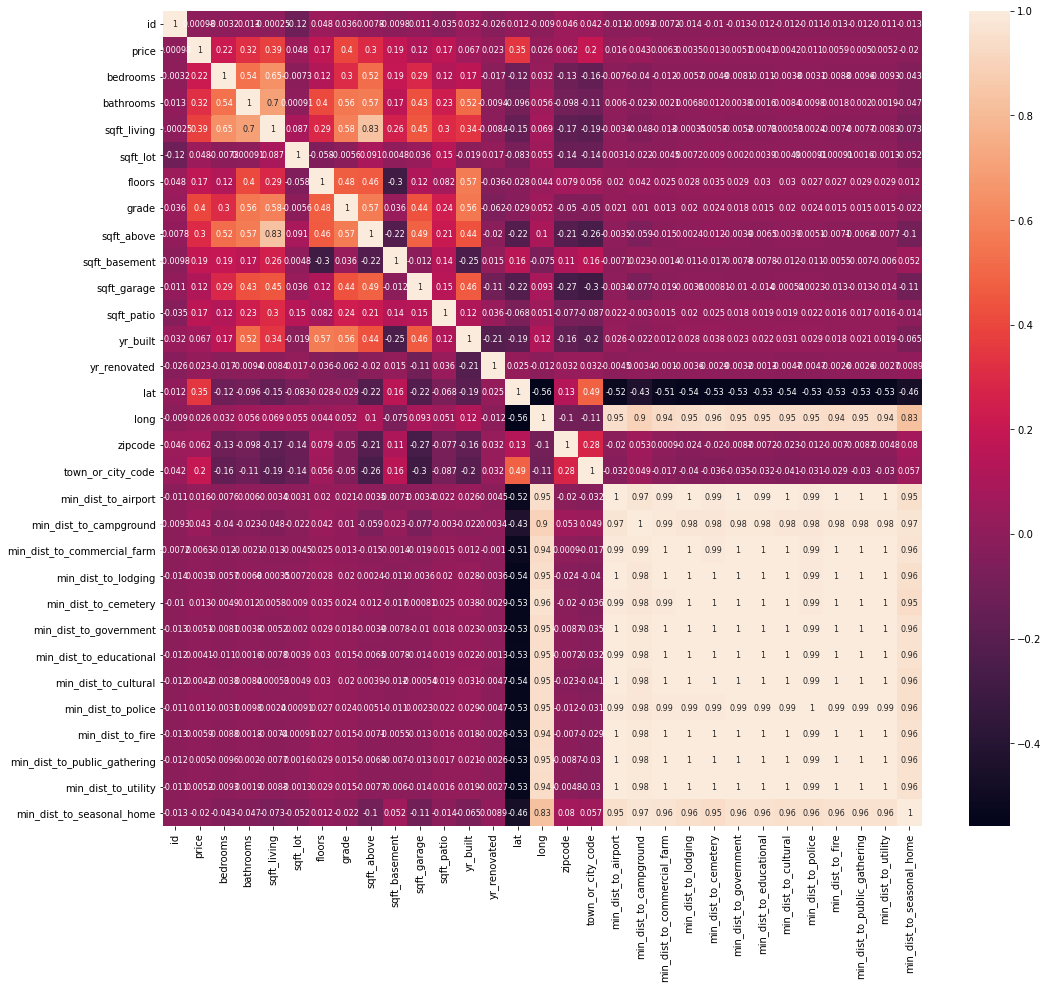

In [52]:
plt.figure(figsize=(17, 15))
sns.heatmap(df.corr(), annot=True, annot_kws={"fontsize":8})
plt.show()